In [34]:
# Create a new directory for your project
#mkdir yolo_object_detection
#cd yolo_object_detection

# Create a virtual environment (optional but recommended)
#python -m venv yolo_env
#source yolo_env/bin/activate  # On Windows: yolo_env\Scripts\activate

# Install required packages
!pip install torch torchvision torchaudio
!pip install ultralytics  # This includes YOLOv8
!pip install opencv-python
!pip install matplotlib
!pip install numpy


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import os
import shutil
from sklearn.model_selection import train_test_split
from ultralytics.data.annotator import auto_annotate


In [37]:
# Define paths
dir_path = "/content/drive/MyDrive/ObjectDetection-Tasks"
filepath = os.path.join(dir_path, "Task-for-model-2")
dataset_path = os.path.join(filepath, 'dataForRetrain-1')
output_dir = os.path.join(filepath, 'labelled_dataForRetrain-1')

labels_source = os.path.join(filepath, "labelData")
images_source = os.path.join(filepath,  "datasetI") # add this if in another directory , "captured_frames"

In [38]:
# Auto-annotate with specific classes and optimized settings
auto_annotate(
    data=dataset_path,
    det_model="yolo11x.pt",  # Ensure this model knows your classes
    sam_model="sam_b.pt",
    device="cuda",
    conf=0.05,  # Lower confidence threshold for smaller objects
    iou=0.45,
    imgsz=1024,  # Higher resolution for small objects
    classes=[0, 1, 2],  # Specify EXACT class indices you want: person, bicycle, car
    output_dir=output_dir
)


image 1/220 /content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/dataForRetrain-1/frame_20250920_114137_130922.jpg: 576x1024 1 person, 77.1ms
image 2/220 /content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/dataForRetrain-1/frame_20250920_114137_645566.jpg: 576x1024 1 person, 73.5ms
image 3/220 /content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/dataForRetrain-1/frame_20250920_114138_153741.jpg: 576x1024 1 person, 192.9ms
image 4/220 /content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/dataForRetrain-1/frame_20250920_114138_666896.jpg: 576x1024 1 person, 85.2ms
image 5/220 /content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/dataForRetrain-1/frame_20250920_114139_180068.jpg: 576x1024 1 person, 74.3ms
image 6/220 /content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/dataForRetrain-1/frame_20250920_114139_694503.jpg: 576x1024 1 person, 74.0ms
image 7/220 /content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/dataForRetrain-1/f

Visualize the resulted image


In [39]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont

def visualize_segmentation_annotations(image_path, annotation_path, label_map=None):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(image)
    draw = ImageDraw.Draw(pil_image)

    # Define colors for different classes
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Red, Green, Blue

    # Read annotation file
    with open(annotation_path, 'r') as f:
        lines = f.readlines()

    # Process each annotation
    for line in lines:
        data = line.strip().split()
        if not data:
            continue

        class_id = int(data[0])
        points = np.array([float(x) for x in data[1:]]).reshape(-1, 2)

        # Convert normalized coordinates to pixel coordinates
        width, height = pil_image.size
        points[:, 0] *= width
        points[:, 1] *= height
        points = [(x, y) for x, y in points]

        # Draw polygon
        color = colors[class_id % len(colors)]
        draw.polygon(points, outline=color, width=3)

        # Add label
        if label_map and class_id in label_map:
            label = label_map[class_id]
            # Draw text background
            bbox = draw.textbbox((points[0][0], points[0][1]), label)
            draw.rectangle(bbox, fill=color)
            # Draw text
            draw.text((points[0][0], points[0][1]), label, fill=(255, 255, 255))

    # Convert back to OpenCV format
    result_image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
    return result_image

# Define your label mapping
label_map = {0: "person", 1: "bicycle", 2: "car"}

# Paths to your files
image_path = "/content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/dataForRetrain-1/frame_20250920_114245_260051.jpg"
annotation_path = "/content/drive/MyDrive/ObjectDetection-Tasks/Task-for-model-2/labelled_dataForRetrain-1/frame_20250920_114245_260051.txt"

# Visualize the annotations
result_image = visualize_segmentation_annotations(image_path, annotation_path, label_map)

# Save the result
cv2.imwrite("verification.jpg", result_image)



True

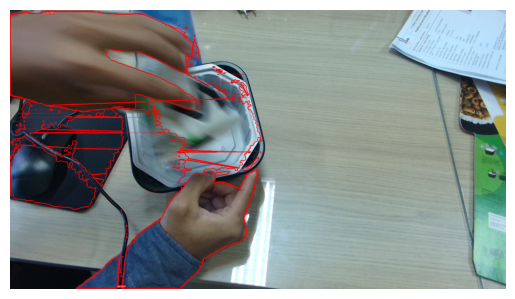

In [40]:
# Optional: Display the image (if in a notebook environment)
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()